## Level statistics for integrable and non-integrable spin chains
A common used fact for determining ergodicity in a quantum system is the fact of level repulsion, which is determined by the spacing between the energy levels of a quantum system respectively their Hamiltonians. Therefore we not study the dynamics of the system ( as we did in introduction.ipynb) but the structure of Hamiltonians for different types of spin chains.
An non ergodic system will follow a Poissonian distribution of level spacings, while a ergodic system shows the form of the Wigner Dyson distribution. Both are simple function of the spacing, which are defined later. If you want to get a better overview of the physics behind level spacings take a look at bsc.pdf.

In [1]:
#Import all needed functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#imports from local helper files
from qm_helper import constructHamilton
from np_helper import state_to_num
from permutations import special_perm

We need to construct the Hamiltonian (as before in introduction.ipynb). We consider here 4 types of systems: Integrable, Defect, weak and strong disordered. Thus we get 4 Hamiltonians for which we can check the level spacing.

In [2]:
#Set system dimensions
N = 12
j = 6

#Coupling constants
J = 1 
r = 0.5

#System states
states = state_to_num(special_perm(N,j))

#Integrable system
epsilons = np.zeros(N)
ham_int = constructHamilton(states,J,r,epsilons,N).todense()
#Defect system
epsilons[j] = r
ham_def = constructHamilton(states,J,r,epsilons,N).todense()
#Weak disordered system
epsilons = np.random.uniform(-0.2,0.2,N)
ham_weakdis = constructHamilton(states,J,r,epsilons,N).todense()
#Strong disordered system
epsilons = np.random.uniform(-3,3,N)
ham_strongdis = constructHamilton(states,J,r,epsilons,N).todense()

In order to obtain the eigenvalues we need to diagonalize these Hamiltonians. This is done using NumPy function (even though this might not be the fastest way!). Afterwars we sort the eigenvalues in increasing order.

In [3]:
eigvals_int = np.sort(np.linalg.eigvals(ham_int))
eigvals_def = np.sort(np.linalg.eigvals(ham_def))
eigvals_weakdis = np.sort(np.linalg.eigvals(ham_weakdis))
eigvals_strongdis = np.sort(np.linalg.eigvals(ham_strongdis))

The most important part is to unfold the eigenspectrum. This is done by seperating the large number of eigenvalues into smaller sections and normalize them with the mean level spacing in their section. Therefore we need a function that calculates the level spacings of a section (i.e. array of eigenenergies). Also we need a function that unfolds the spectrum given a number of sections the energies should be divided to.
Additionaly we define the functions for Poissonian distribution and the Wigner Dyson (Gaussian Orthogonal Ensemble).

In [4]:
#Function that returns level spacings for an array of eigenenergies
def levelspacing(arr):
    return np.abs(np.ediff1d(arr))

#Function to unfold the eigenenergies given a number of division sections
def unfold(energies, num_sections):
    subs = np.array_split(energies,num_sections)
    for i in range(num_sections):
        subs[i] = subs[i] / np.mean(levelspacing(subs[i]))
    return np.concatenate(subs)   

#Poissonian distribution
def poisson(s):
    return np.exp(-s)

#Wigner Dyson distribution
def wignerdyson(s):
    return np.pi*s/2*np.exp(-np.pi*s**2/4)

Now we can unfold the spectrum of each system variation. Note that the resultin spacing is dependent on the choice of number of sections.

In [5]:
spacings_int = levelspacing(unfold(eigvals_int,1))
spacings_def = levelspacing(unfold(eigvals_def,200))
spacings_weakdis = levelspacing(unfold(eigvals_weakdis,200))
spacings_strongdis = levelspacing(unfold(eigvals_strongdis,10))

As a last step we plot the level spacings with the two distributions. We observe that the integrable and strong disordered system follow the Poissonian distribution. The other to system show a indication of ergodicity, while they are following the Wigner-Dyson distribution.

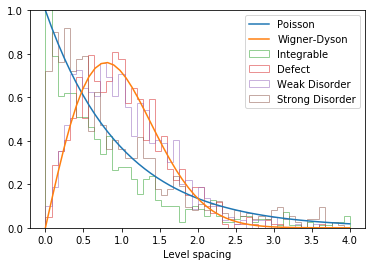

In [6]:
#Plot the distributions
x = np.linspace(0,4,50)
plt.plot(x,poisson(x),label='Poisson')
plt.plot(x,wignerdyson(x),label='Wigner-Dyson')
#Plot the Spacings
plt.hist(spacings_int,bins=50,range=(0,4),histtype=u'step',normed=True,label='Integrable',alpha=0.5)
plt.hist(spacings_def,bins=50,range=(0,4),histtype=u'step',normed=True,label='Defect',alpha=0.5)
plt.hist(spacings_weakdis,bins=50,range=(0,4),histtype=u'step',normed=True,label='Weak Disorder',alpha=0.5)
plt.hist(spacings_strongdis,bins=50,range=(0,4),histtype=u'step',normed=True,label='Strong Disorder',alpha=0.5)
#Figure setups
plt.xlabel('Level spacing')
plt.ylim(0,1)
plt.legend()